# IMPORTING THE NECCESSARY LIBRARIES.

In [17]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.feature_selection import VarianceThreshold
from sklearn.feature_selection import chi2, SelectKBest,SelectPercentile, f_classif
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier


In [2]:
df = pd.read_csv('milknew.csv')

In [3]:
df.head()

,pH,Temprature,Taste,Odor,Fat,Turbidity,Colour,Grade
0,6.6,35,1,0,1,0,254,high
1,6.6,36,0,1,0,1,253,high
2,8.5,70,1,1,1,1,246,low
3,9.5,34,1,1,0,1,255,low
4,6.6,37,0,0,0,0,255,medium


In [4]:
df.shape

(1059, 8)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1059 entries, 0 to 1058
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   pH          1059 non-null   float64
 1   Temprature  1059 non-null   int64  
 2   Taste       1059 non-null   int64  
 3   Odor        1059 non-null   int64  
 4   Fat         1059 non-null   int64  
 5   Turbidity   1059 non-null   int64  
 6   Colour      1059 non-null   int64  
 7   Grade       1059 non-null   object 
dtypes: float64(1), int64(6), object(1)
memory usage: 66.3+ KB


# There is no any nul values, Now lets move on Statistical Analysis

In [9]:
df.describe()

,pH,Temprature,Taste,Odor,Fat,Turbidity,Colour
count,1059.000000,1059.000000,1059.000000,1059.000000,1059.000000,1059.000000,1059.000000
mean,6.630123,44.226629,0.546742,0.432483,0.671388,0.491029,251.840415
std,1.399679,10.098364,0.498046,0.495655,0.469930,0.500156,4.307424
min,3.000000,34.000000,0.000000,0.000000,0.000000,0.000000,240.000000
25%,6.500000,38.000000,0.000000,0.000000,0.000000,0.000000,250.000000
50%,6.700000,41.000000,1.000000,0.000000,1.000000,0.000000,255.000000
75%,6.800000,45.000000,1.000000,1.000000,1.000000,1.000000,255.000000
max,9.500000,90.000000,1.000000,1.000000,1.000000,1.000000,255.000000


In [10]:
df.describe(include='object')

,Grade
count,1059
unique,3
top,low
freq,429


# Check Collerelation Between Columns

In [13]:
df.corr()

,pH,Temprature,Taste,Odor,Fat,Turbidity,Colour
pH,1.000000,0.244684,-0.064053,-0.081331,-0.093429,0.048384,-0.164565
Temprature,0.244684,1.000000,-0.109792,-0.048870,0.024073,0.185106,-0.008511
Taste,-0.064053,-0.109792,1.000000,0.017582,0.324149,0.055755,-0.082654
Odor,-0.081331,-0.048870,0.017582,1.000000,0.314505,0.457935,-0.039361
Fat,-0.093429,0.024073,0.324149,0.314505,1.000000,0.329264,0.114151
Turbidity,0.048384,0.185106,0.055755,0.457935,0.329264,1.000000,0.136436
Colour,-0.164565,-0.008511,-0.082654,-0.039361,0.114151,0.136436,1.000000


<AxesSubplot:>

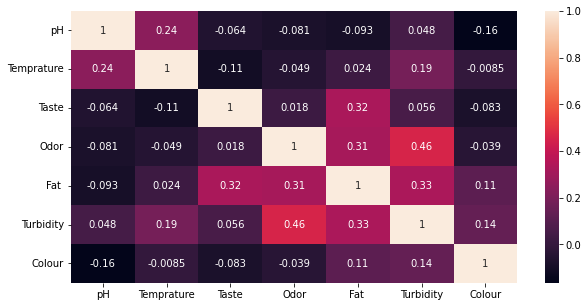

In [19]:
plt.figure(figsize=(10,5))
sns.heatmap(df.corr(),annot=True)

# Feature Engineering 

In [6]:
from sklearn.preprocessing import LabelEncoder

In [7]:
encoder = LabelEncoder()

In [8]:
df['Grade'] = encoder.fit_transform(df['Grade'])

In [9]:
df.head()

,pH,Temprature,Taste,Odor,Fat,Turbidity,Colour,Grade
0,6.6,35,1,0,1,0,254,0
1,6.6,36,0,1,0,1,253,0
2,8.5,70,1,1,1,1,246,1
3,9.5,34,1,1,0,1,255,1
4,6.6,37,0,0,0,0,255,2


# Data split into x and y

In [10]:
x = df.drop(columns='Grade')
y = df['Grade']

In [11]:
y.value_counts()

1    429
2    374
0    256
Name: Grade, dtype: int64

# Over Sampling

In [12]:
from imblearn.over_sampling import SMOTE

In [13]:
sample = SMOTE(random_state=0)

In [14]:
x,y = sample.fit_resample(x,y)

In [15]:
y.value_counts()

0    429
1    429
2    429
Name: Grade, dtype: int64

# Feature Scaling 

In [16]:
from sklearn.preprocessing import MinMaxScaler

In [17]:
scaler = MinMaxScaler()

In [18]:
x = scaler.fit_transform(x)

# Data split into train and test

In [19]:
from sklearn.model_selection import train_test_split

In [20]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.20,random_state=0)

# Apply Logistic Regression

In [21]:
from sklearn.linear_model import LogisticRegression

In [22]:
lgr = LogisticRegression()

In [23]:
lgr.fit(x_train, y_train)

LogisticRegression()

In [24]:
y_pred = lgr.predict(x_test)

# Check Performance of the model

In [25]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

In [26]:
confusion_matrix(y_test,y_pred)

array([[85,  5,  3],
       [14, 68,  5],
       [13,  2, 63]], dtype=int64)

In [27]:
accuracy_score(y_test,y_pred)

0.8372093023255814

In [28]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.76      0.91      0.83        93
           1       0.91      0.78      0.84        87
           2       0.89      0.81      0.85        78

    accuracy                           0.84       258
   macro avg       0.85      0.83      0.84       258
weighted avg       0.85      0.84      0.84       258



In [29]:
from sklearn.model_selection import cross_val_score

In [30]:
cvs = cross_val_score(lgr,x,y,cv=5)

In [31]:
print(cvs)
print(cvs.mean())

[0.86821705 0.84108527 0.87937743 0.83657588 0.85992218]
0.8570355623925436


# There is no underfit or overfit

# now i want to check that what's features  is best for my model

# 1. method to use feature selection

In [32]:
from sklearn.feature_selection import VarianceThreshold

In [33]:
v = VarianceThreshold(threshold=1)
v.fit_transform(df)
v.get_support()

array([ True,  True, False, False, False, False,  True, False])

In [34]:
df.columns

Index(['pH', 'Temprature', 'Taste', 'Odor', 'Fat ', 'Turbidity', 'Colour',
       'Grade'],
      dtype='object')

# 2. method to use feature selection using chi-squared method

In [35]:
from sklearn.feature_selection import chi2, SelectKBest,SelectPercentile, f_classif

In [36]:
chi_best_col = SelectKBest(chi2,k=5)
kbest = chi_best_col.fit_transform(x,y)
np.array(df.drop(columns='Grade').columns)[chi_best_col.get_support()]

array(['Temprature', 'Taste', 'Odor', 'Fat ', 'Turbidity'], dtype=object)

In [37]:
pd.DataFrame(list(zip(df.drop(columns='Grade').columns,chi_best_col.scores_)),columns=['features','scores']).sort_values(by='scores',ascending=False)

,features,scores
5,Turbidity,176.612245
3,Odor,143.136134
4,Fat,114.145695
1,Temprature,53.486398
2,Taste,22.388350
6,Colour,11.012380
0,pH,0.102586


# 3. method to use feature selection using anova method

In [39]:
f_best_col = SelectKBest(f_classif,k=5)
kbest1 = f_best_col.fit_transform(x,y)
np.array(df.drop(columns='Grade').columns)[f_best_col.get_support()]

array(['Temprature', 'Odor', 'Fat ', 'Turbidity', 'Colour'], dtype=object)

In [40]:
pd.DataFrame(list(zip(df.drop(columns='Grade'),f_best_col.scores_)),columns=['features','scores']).sort_values(by='scores',ascending=False)

,features,scores
4,Fat,274.612533
5,Turbidity,239.518365
1,Temprature,218.876159
3,Odor,167.424755
6,Colour,56.358174
2,Taste,26.440420
0,pH,0.751890


# now i want to apply Decision Tree Classifier using 5 important parameters

In [41]:
x1 = df[['Temprature', 'Odor', 'Fat ', 'Turbidity', 'Colour']]
y1 = df['Grade']

In [42]:
x1_train, x1_test, y1_train, y1_test = train_test_split(x1,y1,test_size=0.20,random_state=0)

In [43]:
from sklearn.tree import DecisionTreeClassifier

In [44]:
dtc = DecisionTreeClassifier()

In [45]:
dtc.fit(x1_train,y1_train)

DecisionTreeClassifier()

In [46]:
y1_pred = dtc.predict(x1_test)

In [47]:
from sklearn.metrics import classification_report

In [48]:
print(classification_report(y1_test,y1_pred))

              precision    recall  f1-score   support

           0       0.78      0.85      0.81        66
           1       0.86      0.93      0.90        69
           2       1.00      0.86      0.92        77

    accuracy                           0.88       212
   macro avg       0.88      0.88      0.88       212
weighted avg       0.89      0.88      0.88       212



# we get best accuracy from the previous model

# now i want to cross check using combination of 5 models of decision tree

In [49]:
from sklearn.model_selection import cross_val_score

In [50]:
cvs = cross_val_score(dtc,x1,y1,cv=5)

In [51]:
print(cvs)
print(cvs.mean())

[0.88207547 0.88679245 0.89150943 0.87264151 0.88151659]
0.8829070911204507


# Now, i want to increase my model accuracy using hyper parameter (best parameter)

In [52]:
param_dict = {
    "criterion":['gini','entropy'],
    "max_depth":range(1,10)
}

In [53]:
from sklearn.model_selection import GridSearchCV

In [54]:
grid = GridSearchCV(dtc,param_grid=param_dict,cv=5)
grid.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(1, 10)})

In [55]:
grid.best_params_

{'criterion': 'gini', 'max_depth': 9}

In [56]:
grid.best_score_

0.9854274212645038

# Now i want to use this parameter in my model

In [57]:
dtcp = DecisionTreeClassifier(criterion='gini',max_depth=9)

In [58]:
dtcp.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=9)

In [59]:
y1p_pred = dtcp.predict(x_test)

In [60]:
print(classification_report(y_test,y1p_pred))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98        93
           1       1.00      0.99      0.99        87
           2       0.97      0.96      0.97        78

    accuracy                           0.98       258
   macro avg       0.98      0.98      0.98       258
weighted avg       0.98      0.98      0.98       258



In [61]:
cvs1 = cross_val_score(dtcp,x,y,cv=5)

In [62]:
print(cvs1)
print(cvs1.mean())

[0.97286822 0.98449612 0.98832685 0.9922179  0.9844358 ]
0.9844689771664706


# 

# Apply Random Forest Classifier

In [63]:
from sklearn.ensemble import RandomForestClassifier

In [64]:
rfc = RandomForestClassifier()

In [65]:
rfc.fit(x_train,y_train)

RandomForestClassifier()

In [66]:
yr_pred = rfc.predict(x_test)

In [67]:
print(classification_report(y_test,yr_pred))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99        93
           1       1.00      0.99      0.99        87
           2       0.97      1.00      0.99        78

    accuracy                           0.99       258
   macro avg       0.99      0.99      0.99       258
weighted avg       0.99      0.99      0.99       258



In [68]:
cvsr = cross_val_score(rfc,x,y,cv=5)

In [69]:
print(cvsr)
print(cvsr.mean())

[0.99224806 1.         1.         1.         0.9922179 ]
0.9968931921696378


# Now My model is best because it's giving  99% accuracy without overfiting or underfiting using Random Forest Classifier